<a href="https://colab.research.google.com/github/RenanProjetos/hello/blob/master/preditorLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df = web.DataReader("BBD", data_source='yahoo', start= '2019-01-01', end= '2020-05-19')

In [143]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,8.900000,8.375000,8.400000,8.841666,21553500.0,8.292581
2019-01-03,9.008333,8.791667,8.916667,8.950000,16034800.0,8.399035
2019-01-04,9.191667,8.808333,8.883333,9.066667,15384000.0,8.508523
2019-01-07,9.216666,9.016666,9.200000,9.041667,22475500.0,8.485060
2019-01-08,9.225000,8.916667,9.000000,9.191667,22215600.0,8.625822
...,...,...,...,...,...,...
2020-05-13,2.980000,2.790000,2.960000,2.870000,24935400.0,2.870000
2020-05-14,3.060000,2.680000,2.790000,3.040000,36485200.0,3.040000
2020-05-15,3.110000,2.920000,3.050000,2.940000,16980900.0,2.940000


In [144]:
df.shape

(348, 6)

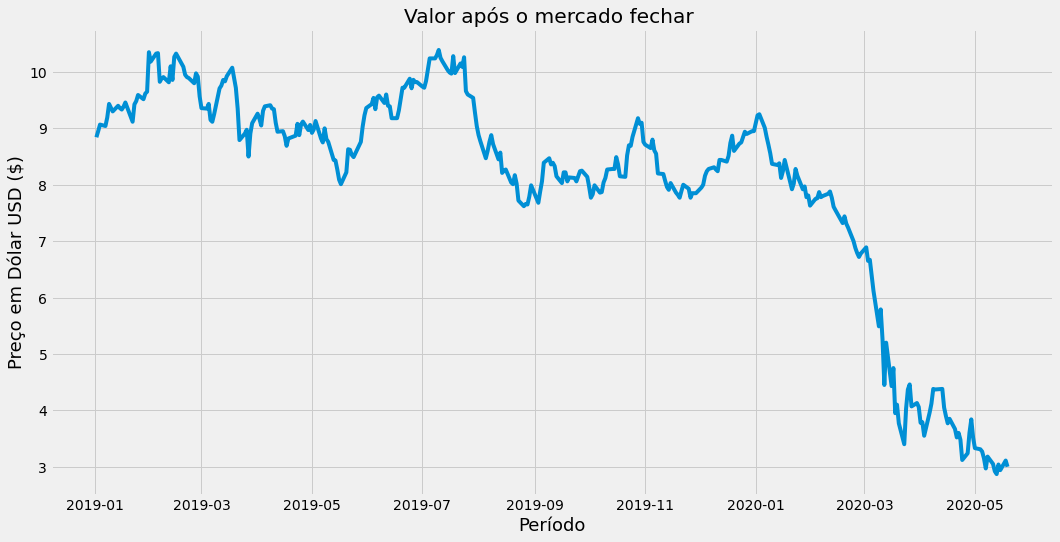

In [145]:
plt.figure(figsize=(16,8))
plt.title('Valor após o mercado fechar ')
plt.plot(df['Close'])
plt.xlabel('Período', fontsize=18)
plt.ylabel('Preço em Dólar USD ($)', fontsize=18)
plt.show()

In [146]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

279

In [0]:
scaler = MinMaxScaler (feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [148]:
scaled_data

array([[0.79410452],
       [0.80851058],
       [0.82402478],
       [0.82070036],
       [0.84064712],
       [0.87278366],
       [0.86391842],
       [0.85505318],
       [0.86835098],
       [0.86281028],
       [0.85948574],
       [0.8661347 ],
       [0.87610808],
       [0.83067374],
       [0.87167552],
       [0.87943262],
       [0.89383855],
       [0.88386518],
       [0.8971631 ],
       [0.90159565],
       [0.99468086],
       [0.97251769],
       [0.99135631],
       [0.99246445],
       [0.92486695],
       [0.93262406],
       [0.9359486 ],
       [0.92375882],
       [0.96143618],
       [0.92929964],
       [0.98359921],
       [0.99135631],
       [0.96032791],
       [0.94148929],
       [0.9359486 ],
       [0.93373219],
       [0.92154254],
       [0.94481384],
       [0.93705674],
       [0.89051414],
       [0.86281028],
       [0.86170214],
       [0.87278366],
       [0.8351063 ],
       [0.83067374],
       [0.84840422],
       [0.90935275],
       [0.916

In [149]:
 train_data = scaled_data[0:training_data_len , : ]
 x_train = []
 y_train = []
 for i in range(60, len(train_data)):
   x_train.append(train_data[i-60:i, 0])
   y_train.append(train_data[i, 0])
   if i<= 61:
      print(x_train)
      print(y_train)
      print()

[array([0.79410452, 0.80851058, 0.82402478, 0.82070036, 0.84064712,
       0.87278366, 0.86391842, 0.85505318, 0.86835098, 0.86281028,
       0.85948574, 0.8661347 , 0.87610808, 0.83067374, 0.87167552,
       0.87943262, 0.89383855, 0.88386518, 0.8971631 , 0.90159565,
       0.99468086, 0.97251769, 0.99135631, 0.99246445, 0.92486695,
       0.93262406, 0.9359486 , 0.92375882, 0.96143618, 0.92929964,
       0.98359921, 0.99135631, 0.96032791, 0.94148929, 0.9359486 ,
       0.93373219, 0.92154254, 0.94481384, 0.93705674, 0.89051414,
       0.86281028, 0.86170214, 0.87278366, 0.8351063 , 0.83067374,
       0.84840422, 0.90935275, 0.91600172, 0.92929964, 0.92597509,
       0.93816488, 0.95811163, 0.93373219, 0.91046089, 0.86170214,
       0.78745568, 0.80296988, 0.81183512, 0.74867018, 0.80296988])]
[0.8273491964533463]

[array([0.79410452, 0.80851058, 0.82402478, 0.82070036, 0.84064712,
       0.87278366, 0.86391842, 0.85505318, 0.86835098, 0.86281028,
       0.85948574, 0.8661347 , 0.876

In [0]:
 x_train, y_train = np.array(x_train), np.array(y_train)


In [151]:
 x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1 ))
 x_train.shape

(219, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [154]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
219/219 [==============================] - 9s 42ms/step - loss: 0.0136


In [0]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
     x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
 x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
 predictions = model.predict(x_test)
 predictions = scaler.inverse_transform(predictions)

In [159]:
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


1.5649544657508139

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


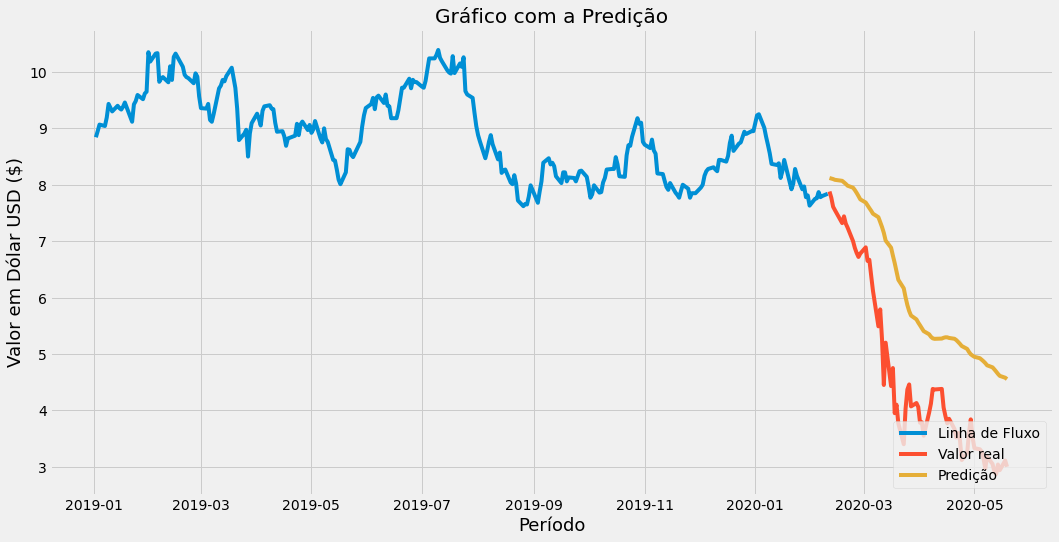

In [164]:
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions
  
  plt.figure(figsize=(16,8))
  plt.title('Gráfico com a Predição')
  plt.xlabel('Período', fontsize=18)
  plt.ylabel('Valor em Dólar USD ($)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Linha de Fluxo', 'Valor real', 'Predição'], loc='lower right')
  plt.show() 

In [165]:
valid

,Close,Predictions
Date,,
2020-02-11,7.88,8.119518
2020-02-12,7.77,8.110236
2020-02-13,7.61,8.101017
2020-02-14,7.55,8.087309
2020-02-18,7.32,8.069531
...,...,...
2020-05-13,2.87,4.687826
2020-05-14,3.04,4.646800
2020-05-15,2.94,4.611667


In [162]:
apple_quote = web.DataReader("ABEV", data_source='yahoo', start='2020-01-01', end= '2020-05-19')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[3.691507]]


In [163]:
apple_quote2 = web.DataReader('ABEV',data_source='yahoo', start='2019-01-01', end='2020-05-19')
print(apple_quote2['Close'])

Date
2019-01-02    4.20
2019-01-03    4.24
2019-01-04    4.42
2019-01-07    4.35
2019-01-08    4.33
              ... 
2020-05-13    1.94
2020-05-14    2.04
2020-05-15    2.02
2020-05-18    2.13
2020-05-19    2.09
Name: Close, Length: 348, dtype: float64
